# Prediksi Kesuksesan Suatu Restoran di Aplikasi Zomato 

In [199]:
from pyforest import *
import warnings
import warnings
import sqlite3
warnings.filterwarnings('ignore')
import statsmodels.api as sm

from sklearn import tree
from functools import partial
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import validation_curve, GridSearchCV, RandomizedSearchCV

In [2]:
koneksi = sqlite3.connect(r'C:/Users/ASUS/kode/projek/Prediksi_Kesuksesan Perusahaan Zomato/zomato_rawdata.sqlite')

In [3]:
df = pd.read_sql_query("SELECT * FROM USERS", koneksi)

<IPython.core.display.Javascript object>

In [4]:
df

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,None,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,None,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,None,0,None,Whitefield,Bar,None,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

### Cleaning Data

In [6]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Data pada fitur approx_cost dan Rate terbilang penting dikarenakan mengenai rating dari suatu restoran

In [7]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
# mulai dari menangani null dari approx_cost
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [9]:
# hapus tanda kutip
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')

In [10]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [11]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [12]:
# laluu kita coba bersihin data di kolom rate [/5, dll]
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df['rate'] = df['rate'].str.replace('/5', '')

In [14]:
df['rate'] = df['rate'].astype(str)

In [15]:
df['rate'].replace('NEW', np.nan, inplace=True)
df['rate'].replace('None', np.nan, inplace=True)
df['rate'].replace('-', np.nan, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
df['rate'].isnull().sum()

10052

In [17]:
df['rate'].astype(float)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

sehingga jadi lebih jelas berapa jumlah data kosong di kolom rate

#### Insight: Analisis makanan paling populer dari restoran yang populer

In [18]:
# cari top restoran
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [19]:
df['rest_type'].isnull().sum()

227

In [20]:
# bisa dihapus karena sedikit
data = df.dropna(subset=['rest_type'])

In [21]:
data.shape

(51490, 18)

In [22]:
# kita tahu kalau restoran quick bites itu restoran top
data_top_rest = data[data['rest_type'].str.contains('Quick Bites')] #restoran apapun di data yang mengandung Quick Bitess

In [23]:
data_top_rest.shape

(20639, 18)

In [24]:
# restoran udah lalu lanjut ke makanan populer
data_top_rest['dish_liked']

3                                              Masala Dosa
23                                         Pasta, Iced Tea
26                                                    None
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              Burgers
Name: dish_liked, Length: 20639, dtype: object

In [25]:
data_top_rest['dish_liked'].str.lower()

3                                              masala dosa
23                                         pasta, iced tea
26                                                    None
31       burgers, lassi, chicken grill, naan, momos, ch...
34       rolls, veggie wrap, chocolate fantasy, rice bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              burgers
Name: dish_liked, Length: 20639, dtype: object

kita ubah jadi lowercase supaya kan nanti kita pakai visualisasi nlp yaitu wordcloud atau kata terpopulernya

In [26]:
makanan = data_top_rest['dish_liked'].str.lower().str.cat() #cat() untuk gabungin semua string menjadi satu str tunggal

In [27]:
makanan

'masala dosapasta, iced teaburgers, lassi, chicken grill, naan, momos, chicken burger, biryanirolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrapdabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuriburgers, fries, hot chocolatepane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacosbiryaniparatha, pastapasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghettigrape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rollsvegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryanirolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese rollbenne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosamasala dosapanipuri, chaat, noodles, dahi bhallerooftop ambiencecoffee, tea, kesari bath, open dosa, vada, idli, bread dosamasala dosa, tirupathi pongal, filter coffee, vada

In [28]:
!pip install wordcloud

In [29]:
import wordcloud
from wordcloud import WordCloud

In [30]:
wordcloud = WordCloud().generate(makanan) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-0.5, 399.5, 199.5, -0.5)

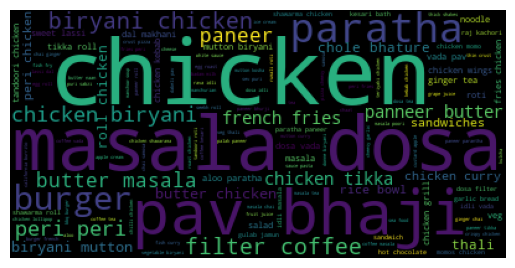

In [31]:
# viz
plt.imshow(wordcloud)
plt.axis('off')

Maka dari itu kita dapat mengetahui bahwa makanan paling populer dari tempat makan di restoran Quick Bites yaitu Masala dosa, Biryani, Chicken, Burger, Paratha

### Missing value handle

In [32]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

kita harus melakukan sesuatu terhadap kolom rate, dish_liked, dan lain-lain

In [33]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [34]:
df[['rate', 'reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


ternyata reviews list itu juga kadang mengandung informasi dari rating restoran. mungkin kita bisa gunakan untuk mengisi baris yang kosong

In [35]:
df['rate'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

In [36]:
df[df['rate'].isnull()].head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NaN,0,+91 8050884222,Banashankari,Quick Bites,None,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari


In [37]:
df[df['rate'].isnull()].index #indeks berapa aja NaN

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10052)

In [38]:
# misalkan kita cek 110
df['rate'][110]

nan

In [39]:
df['reviews_list'][110]

"[('Rated 1.0', 'RATED\\n  I have been here many times when it was located in bda to have crispy n crunchy sandwiches, but now they have shifted to another shop, at present the taste of sandwichs are pathetic, i never expected this..'), ('Rated 1.0', 'RATED\\n  For once known to be serving one of the best sandwich s in Bangalore to this. The quality has gone really bad. They have increased the prices and have replaced the cheese slices with the modest portion of mayo for almost all of their sandwiches.\\n\\nThey also cheap out in adding tomatoes or any other vegetables for chats and you actually need to tell the guy to add all that! He bluntly says he cannot. Talk about customer service.\\n\\nThe quality and experience has really come down and I would recommend to not go there due to this experience.')]"

In [40]:
type(df['reviews_list'][110])

str

In [41]:
import ast

Library ast (Abstract Syntax Trees) adalah bagian dari Python yang membantu dalam analisis dan pemrosesan kode Python. Ini membantu dalam memahami struktur sintaksis kode Python secara programatik. Sederhananya dia bisa bantu kita untuk proses kode, misalkan di data review_list itu diubah dengan 'ast' jadi array atau list supaya kita bisa akses indeksnya

In [42]:
ast.literal_eval(df['reviews_list'][110]) #output = list atau array dari suatu tuple

[('Rated 1.0',
  'RATED\n  I have been here many times when it was located in bda to have crispy n crunchy sandwiches, but now they have shifted to another shop, at present the taste of sandwichs are pathetic, i never expected this..'),
 ('Rated 1.0',
  'RATED\n  For once known to be serving one of the best sandwich s in Bangalore to this. The quality has gone really bad. They have increased the prices and have replaced the cheese slices with the modest portion of mayo for almost all of their sandwiches.\n\nThey also cheap out in adding tomatoes or any other vegetables for chats and you actually need to tell the guy to add all that! He bluntly says he cannot. Talk about customer service.\n\nThe quality and experience has really come down and I would recommend to not go there due to this experience.')]

In [43]:
rate_pertama = ast.literal_eval(df['reviews_list'][110])[0]

In [44]:
rate_pertama #masih dalam tuple

('Rated 1.0',
 'RATED\n  I have been here many times when it was located in bda to have crispy n crunchy sandwiches, but now they have shifted to another shop, at present the taste of sandwichs are pathetic, i never expected this..')

In [45]:
[i.replace('Rated' , '').strip() for i in rate_pertama] #sekarang udah jadi list

['1.0',
 'RATED\n  I have been here many times when it was located in bda to have crispy n crunchy sandwiches, but now they have shifted to another shop, at present the taste of sandwichs are pathetic, i never expected this..']

In [46]:
[i.replace('Rated', '').strip() for i in rate_pertama][0] #mennghapus 'rated' dan menggunakan strip untuk pisah

'1.0'

In [47]:
type([i.replace('Rated', '').strip() for i in rate_pertama][0])

str

In [48]:
float([i.replace('Rated', '').strip() for i in rate_pertama][0])

1.0

In [49]:
# kita udah berhasil, tapi mending bikin fungsi untuk semuanya

def ambil_rating(x):
    daftar_review = ast.literal_eval(x) #ambil tuplenya
    
    if daftar_review is None or len(daftar_review) <= 1: #karena artinya cuma 1 tuple
        return None
    else:
        rate_pertama = daftar_review[0]
        rating = float([i.replace('Rated', '').strip() for i in rate_pertama][0])
        
        return rating

In [50]:
df['rating_dari_list_review'] = df['reviews_list'].apply(ambil_rating)

In [51]:
df['rating_dari_list_review']

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: rating_dari_list_review, Length: 51717, dtype: float64

In [52]:
ambil_rating(df['reviews_list'][110])

1.0

In [53]:
# lalu kita coba handling missing value pada fitur lain

df['rating_dari_list_review']

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: rating_dari_list_review, Length: 51717, dtype: float64

In [54]:
df['rating_dari_list_review'][72]

4.0

In [55]:
df['rate'][72]

nan

In [56]:
df['rate'][72] = df['rating_dari_list_review'][72] #kita terapin kesmuanya

In [57]:
nan_index = df[df['rate'].isnull()].index # ambil semua indeks yang nan

In [58]:
nan_index

Index([   75,    84,    90,    91,    92,   107,   110,   113,   114,   115,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10051)

In [59]:
# isi yang nan di 'rate' dengan kolom rating_dari_list_review

for index in nan_index:
    df['rate'][index] = df['rating_dari_list_review'][index]

In [60]:
df['rate'].isnull().sum()

8542

In [61]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            8542
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rating_dari_list_review        16120
dtype: int64

ternyata kalau dilihat dari dish_liked itu hampir setengah dari dataset kita itu kosong, jadi mending kita hapus

In [62]:
dataframe = df.drop(['dish_liked', 'rating_dari_list_review'], axis=1)

In [63]:
dataframe.head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Feature Extraction

Kita bisa lihat dari salah satu data kategorikal atau teks yaitu cuisines atau jenis masakaan

In [64]:
dataframe['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [65]:
dataframe['cuisines'][0]

'North Indian, Mughlai, Chinese'

In [66]:
dataframe['cuisines'][0].split(',') #jadi list array

['North Indian', ' Mughlai', ' Chinese']

In [67]:
len(dataframe['cuisines'][0].split(','))

3

Jadi dari sini, daripada nanti kita terapin encoding dan itu akan banyak banget. Mending kita hitung aja ada berapa banyak jenis makanan yang disajikan

In [68]:
def hitung(baris):
    return len(baris.split(',')) # fungsi split ini coccok untuk data string

In [69]:
dataframe['Total_sajian'] = dataframe['cuisines'].astype(str).apply(hitung)

In [70]:
# kita terapin juga pada fitur tipe restoran
dataframe['multiple_types'] = dataframe['rest_type'].astype(str).apply(hitung)

In [71]:
dataframe.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Total_sajian,multiple_types
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1


### Tujuaan
Karena tujuan kita adalah untuk memprediksi kesuksesan perusahaan restoran di aplikasi Zomato. Artinya kita bisa coba untuk membuat label restoran mana yang sukses atau tidak. Mengguunakan fitur 'Rate'

In [72]:
dataframe['rate'] = dataframe['rate'].astype(float)

In [73]:
threshold = 3.80 #float
dataframe['target'] = dataframe['rate'].apply(lambda x: 1 if x >= threshold else 0)

In [74]:
dataframe.head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Total_sajian,multiple_types,target
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,1
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1,1


### Rate
Sampai tahap ini kita sudah membuat label berdasarkan kolom 'rate'. Sehingga kolom rate ini mungkin kita akan tidak gunakan lagi kedepannya. Jadi tidak perlu dilanjutkan untuk filling NaN nya

### Feature Importance
#### Analisis Univariate
analisis suatu fitur terhadap variabel target kita

In [75]:
dataframe['target']==0

0        False
1        False
2        False
3         True
4        False
         ...  
51712     True
51713     True
51714     True
51715    False
51716     True
Name: target, Length: 51717, dtype: bool

In [76]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Total_sajian', 'multiple_types',
       'target'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

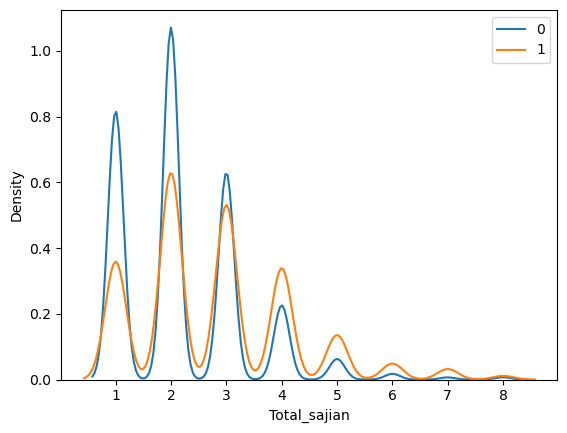

In [77]:
# analisis tipe restoran terhadap target sukses/tidak
sns.distplot(dataframe[dataframe['target']==0]['Total_sajian'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['Total_sajian'], hist=False, label='1')
plt.legend()

viz itu menunjukkan bahwa 'total_cuisines' bukanlah fitur yang menarik dalam memprediksi apakah suatu restoran akan berhasil atau tidak karena kita memiliki wilayah yang tumpang tindih yang sangat sedikit.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

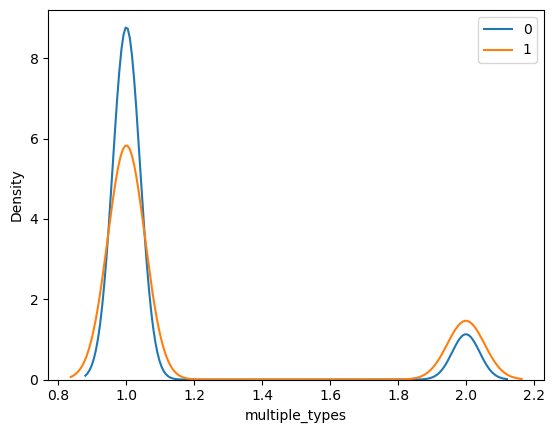

In [78]:
# analisis tipe restoran terhadap target sukses/tidak
sns.distplot(dataframe[dataframe['target']==0]['multiple_types'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['multiple_types'], hist=False, label='1')
plt.legend()

fitur 'multiple_types' bukanlah fitur yang menarik dalam memprediksi apakah restoran akan sukses atau tidak, karena pada grafik tersebut cukup sedikit yang overlapping atau tumpang tindih

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

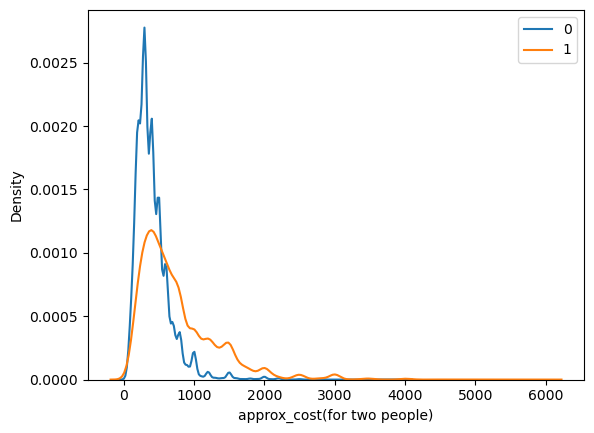

In [79]:
# analisis biaya restoran untuk 2 orang terhadap target sukses/tidak
sns.distplot(dataframe[dataframe['target']==0]['approx_cost(for two people)'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['approx_cost(for two people)'], hist=False, label='1')
plt.legend()

Hubungan dari kedua fitur tersebut cukup baik terdapat beberapa overlapping. Atau disebut dengan Partial Overalapping

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

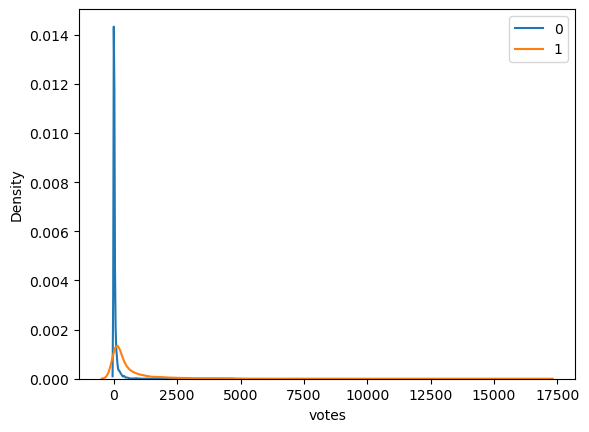

In [80]:
# analisis jumlah voting terhadap target sukses/tidak
sns.distplot(dataframe[dataframe['target']==0]['votes'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['votes'], hist=False, label='1')
plt.legend()

fitur votes juga sama merupakan fitur yang mungkin berguna

### Memilih dan Melakukan Teknik Encoding

In [81]:
dataframe.head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Total_sajian,multiple_types,target
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,1
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1,1


In [82]:
# tapi kita hapus dlu yang na
dataframe = dataframe.dropna()

In [83]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Total_sajian', 'multiple_types',
       'target'],
      dtype='object')

dari sini kita bisa tentuin fitur yang penting untuk pemodelan nanti. Jadi fitur seperti yang unik yaitu index,url,address, name itu mungkin tidak dipakai

kita tidak menggunakan kolom rate lagi, lalu kolom cuisines dan dan multiple_types karena mungkin tidak akan terlalu berguna fiturnya, dll.

In [84]:
imp_features = ['online_order', 'book_table',
       'votes',  'location', 'rest_type', 
       'approx_cost(for two people)', 
       'listed_in(type)', 'listed_in(city)', 'target']

In [85]:
data = dataframe[imp_features]

In [86]:
data.shape

(42144, 9)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

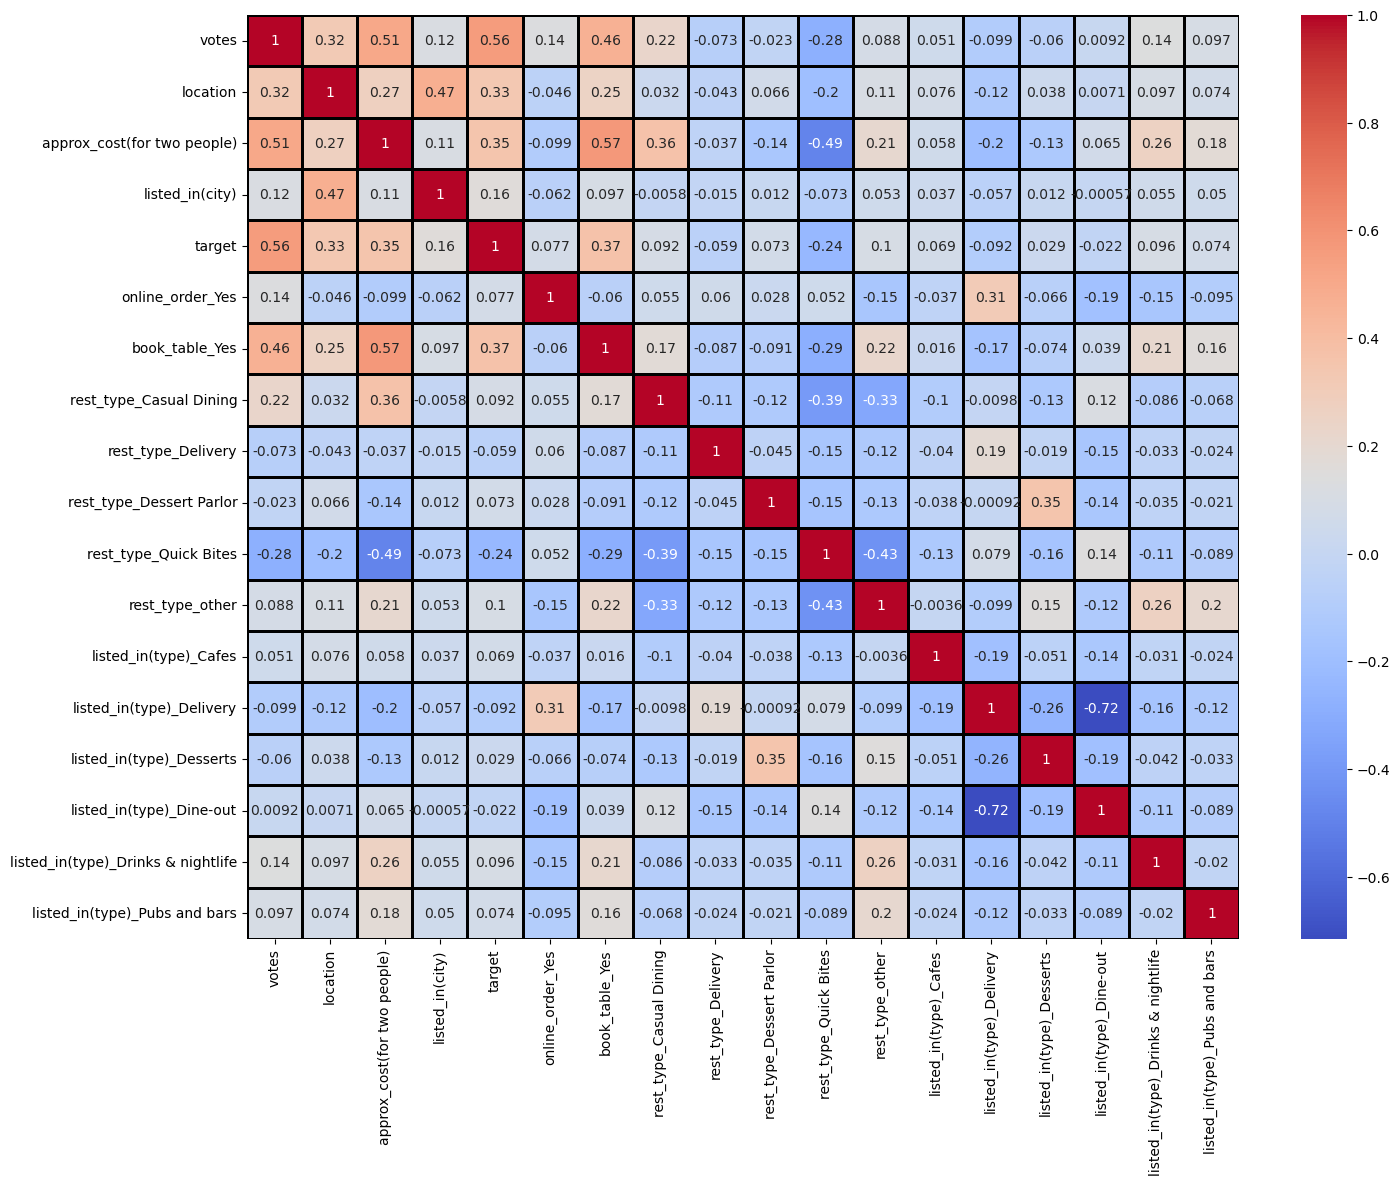

In [167]:
corr_matrix = data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linecolor='black', linewidths=1.0, xticklabels=True, yticklabels=True)
plt.show()

In [87]:
# bagi jadi fitur kategorikal dan numerik

In [88]:
cat_features = [col for col in data.columns if data[col].dtype=='O']
num_features = [col for col in data.columns if data[col].dtype!='O']

In [89]:
# lagi kita coba dari fitur online_order
data['online_order'].nunique()

2

In [90]:
for feature in cat_features:
    print('{} itu memiliki {} fitur unik'.format(feature, data[feature].nunique()))

online_order itu memiliki 2 fitur unik
book_table itu memiliki 2 fitur unik
location itu memiliki 92 fitur unik
rest_type itu memiliki 87 fitur unik
listed_in(type) itu memiliki 7 fitur unik
listed_in(city) itu memiliki 30 fitur unik


Kategori rest_type, location, dan lised_in(city) itu memiliki sangat banyak kategori. Sehingga jika kita menerapkan one hot encoding seperti fitur lainnya itu akan memakan banyak memori dan belum tentu fitu terserbu akan berguna

lebih banyak fitur karena 92 + 87 + 30 = 209 fitur

In [91]:
# kita coba dari fitur rest_type dulu

data['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51709     Casual Dining, Bar
51711     Casual Dining, Bar
51712                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 42144, dtype: object

In [92]:
freq_cat = data['rest_type'].value_counts()
freq_cat

rest_type
Quick Bites                   14269
Casual Dining                  9759
Cafe                           3365
Dessert Parlor                 1887
Delivery                       1710
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Bakery, Food Court                1
Name: count, Length: 87, dtype: int64

In [93]:
freq_cat = data['rest_type'].value_counts()[0:5]/len(data)*100
freq_cat

rest_type
Quick Bites       33.857726
Casual Dining     23.156321
Cafe               7.984529
Dessert Parlor     4.477506
Delivery           4.057517
Name: count, dtype: float64

jadi dari top 5 tipe restoran aku pengen liat seberapa banyak data yang diwakilkan dari kelima kategori tersebut. Ternyata hampir 75% lebih data itu diwakilkan dari top 5 tipe restoran tersebut. Sehingga bisa kita terapkan encoding

In [94]:
freq_cat.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery'], dtype='object', name='rest_type')

In [95]:
data['rest_type'].isin(freq_cat.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51709    False
51711    False
51712    False
51715    False
51716    False
Name: rest_type, Length: 42144, dtype: bool

In [96]:
# terapin
data[data['rest_type'].isin(freq_cat.index)]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
5,Yes,No,286,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...
51632,No,No,4,KR Puram,Quick Bites,350.0,Dine-out,Whitefield,0
51634,No,No,34,Brookefield,Quick Bites,200.0,Dine-out,Whitefield,0
51635,No,No,7,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0
51640,No,No,31,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0


In [97]:
data['rest_type'] = data['rest_type'].apply(lambda x: 'other' if x not in freq_cat.index else x)

In [98]:
data['rest_type']

0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51709            other
51711            other
51712            other
51715            other
51716            other
Name: rest_type, Length: 42144, dtype: object

In [99]:
# kita lanjut ke fitur kategorikal selanjtnya

data['listed_in(city)'].value_counts()/len(data)*100

listed_in(city)
BTM                      6.304575
Koramangala 7th Block    5.682897
Koramangala 5th Block    5.464598
Koramangala 4th Block    5.455106
Koramangala 6th Block    5.108675
Jayanagar                4.683941
JP Nagar                 4.002942
Indiranagar              3.734814
Church Street            3.673121
MG Road                  3.644647
Brigade Road             3.571090
Lavelle Road             3.485668
HSR                      3.246014
Residency Road           3.219913
Marathahalli             3.113136
Bannerghatta Road        2.987377
Whitefield               2.920938
Old Airport Road         2.821279
Brookefield              2.783314
Basavanagudi             2.565015
Kammanahalli             2.484339
Sarjapur Road            2.446374
Kalyan Nagar             2.432137
Bellandur                2.337225
Frazer Town              2.318242
Malleshwaram             2.242312
Electronic City          2.080961
Rajajinagar              2.078588
Banashankari             1.74402

penerapan one hot encoding tidak cocok. karena top 5 tidak mewakkilkan 75% data

In [100]:
# lanjut

data['location'].value_counts()/len(data)*100

location
BTM                      9.586181
Koramangala 5th Block    5.457479
HSR                      4.857156
Indiranagar              4.325645
JP Nagar                 4.235478
                           ...   
Yelahanka                0.009491
West Bangalore           0.009491
Rajarajeshwari Nagar     0.004746
Nagarbhavi               0.002373
Peenya                   0.002373
Name: count, Length: 92, dtype: float64

fitur location juga tidak bisa diterapin one hot encoding

In [101]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [102]:
# kita mulai dari yang obvious dlu
dataframe['online_order']

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51709     No
51711     No
51712     No
51715     No
51716     No
Name: online_order, Length: 42144, dtype: object

In [103]:
pd.get_dummies(data['online_order'], prefix='online_order', drop_first=True, dtype=int)

<IPython.core.display.Javascript object>

,online_order_Yes
0,1
1,1
2,1
3,0
4,0
...,...
51709,0
51711,0
51712,0
51715,0


In [104]:
# berhasil, kita coba terapin one hot encoding sekaligus dengan perulangan

for col in ['online_order', 'book_table', 'rest_type', 'listed_in(type)']:
    col_encoded = pd.get_dummies(data[col], prefix=col, drop_first=True, dtype=int)
    data = pd.concat([data, col_encoded], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
data.head(5)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,Banashankari,other,800.0,Buffet,Banashankari,1,1,...,0,0,0,1,0,0,0,0,0,0
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,0,...,0,0,1,0,0,0,0,0,0,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,0,...,0,0,0,0,0,0,0,0,0,0


### menerapkan teknik encoding: mean encoding terhadap data yang banyak kategorinya

In [106]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [107]:
data[['location', 'listed_in(city)']]

,location,listed_in(city)
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari
3,Banashankari,Banashankari
4,Basavanagudi,Banashankari
...,...,...
51709,Whitefield,Whitefield
51711,Whitefield,Whitefield
51712,Whitefield,Whitefield
51715,"ITPL Main Road, Whitefield",Whitefield


In [108]:
data.groupby(['location'])['target'].mean()

location
BTM                  0.329703
Banashankari         0.477124
Banaswadi            0.259494
Bannerghatta Road    0.305071
Basavanagudi         0.523333
                       ...   
West Bangalore       0.250000
Whitefield           0.404599
Wilson Garden        0.286458
Yelahanka            0.500000
Yeshwantpur          0.223214
Name: target, Length: 92, dtype: float64

In [109]:
dict_mean_lokasi = data.groupby(['location'])['target'].mean().to_dict()

ingatt kalau to_dict() mengonversi struktur data seperti DataFrame atau Series menjadi bentuk kamus (dictionary) di Python

In [110]:
data['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51709                    Whitefield
51711                    Whitefield
51712                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 42144, dtype: object

In [111]:
data['location'] = data['location'].map(dict_mean_lokasi)

.map() digunakan untuk memetakan nilai dalam kolom 'location' dengan menggunakan kamus dict_mean_lokasi, yang kemudian akan mengganti nilai-nilai tersebut dengan nilai yang sesuai dari kamus tersebut. Sedangkan .apply() lebih umum digunakan untuk fungsi-fungsi yang lebih kompleks atau ketika perlu menerapkan fungsi ke seluruh baris atau kolom dalam DataFrame.

In [112]:
data['location']

0        0.477124
1        0.477124
2        0.477124
3        0.477124
4        0.523333
           ...   
51709    0.404599
51711    0.404599
51712    0.404599
51715    0.329670
51716    0.329670
Name: location, Length: 42144, dtype: float64

In [113]:
data['listed_in(city)']

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Banashankari
             ...     
51709      Whitefield
51711      Whitefield
51712      Whitefield
51715      Whitefield
51716      Whitefield
Name: listed_in(city), Length: 42144, dtype: object

In [114]:
# kita terapin ke kota juga
dict_mean_kota = data.groupby(['listed_in(city)'])['target'].mean().to_dict()

In [115]:
dict_mean_kota

{'BTM': 0.4904027098231088,
 'Banashankari': 0.48299319727891155,
 'Bannerghatta Road': 0.35901509134233517,
 'Basavanagudi': 0.517113783533765,
 'Bellandur': 0.4050761421319797,
 'Brigade Road': 0.5953488372093023,
 'Brookefield': 0.3589087809036658,
 'Church Street': 0.5930232558139535,
 'Electronic City': 0.2645381984036488,
 'Frazer Town': 0.518935516888434,
 'HSR': 0.4685672514619883,
 'Indiranagar': 0.5648030495552732,
 'JP Nagar': 0.42916419679905154,
 'Jayanagar': 0.49442755825734547,
 'Kalyan Nagar': 0.4370731707317073,
 'Kammanahalli': 0.44317096466093603,
 'Koramangala 4th Block': 0.5337103088299261,
 'Koramangala 5th Block': 0.5349544072948328,
 'Koramangala 6th Block': 0.5373896888063168,
 'Koramangala 7th Block': 0.5340292275574112,
 'Lavelle Road': 0.5684138869979578,
 'MG Road': 0.5989583333333334,
 'Malleshwaram': 0.49947089947089945,
 'Marathahalli': 0.3407012195121951,
 'New BEL Road': 0.4079861111111111,
 'Old Airport Road': 0.5315391084945332,
 'Rajajinagar': 0.439

In [116]:
data['listed_in(city)'] = data['listed_in(city)'].map(dict_mean_kota)

In [117]:
data['listed_in(city)']

0        0.482993
1        0.482993
2        0.482993
3        0.482993
4        0.482993
           ...   
51709    0.406986
51711    0.406986
51712    0.406986
51715    0.406986
51716    0.406986
Name: listed_in(city), Length: 42144, dtype: float64

#### Kita rapihin tabel-tabel hasil encoding

In [118]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [119]:
data.head(5)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,0.477124,Casual Dining,800.0,Buffet,0.482993,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,0.477124,Casual Dining,800.0,Buffet,0.482993,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,0.477124,other,800.0,Buffet,0.482993,1,1,...,0,0,0,1,0,0,0,0,0,0
3,No,No,88,0.477124,Quick Bites,300.0,Buffet,0.482993,0,0,...,0,0,1,0,0,0,0,0,0,0
4,No,No,166,0.523333,Casual Dining,600.0,Buffet,0.482993,1,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
data.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

In [121]:
# kita drop kolom yang udah nggak kepake lagi

data.drop(['online_order', 'book_table', 'rest_type', 'listed_in(type)'], axis=1, inplace=True)

In [122]:
data.head(5)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,0.477124,800.0,0.482993,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,787,0.477124,800.0,0.482993,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,918,0.477124,800.0,0.482993,1,1,0,0,0,0,0,1,0,0,0,0,0,0
3,88,0.477124,300.0,0.482993,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,166,0.523333,600.0,0.482993,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [123]:
data.columns

Index(['votes', 'location', 'approx_cost(for two people)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

## Feature Engneering😢
### Handling Outlier:

Seperti yang diketahui bahwa outlier atau pencilan itu sangat mempengaruhi rata-rata dan standar deviasi dari kumpulan data. Sebagian besar algoritma pembelajaran mesin tidak bekerja dengan baik dengan adanya pencilan. Jadi, sangat penting untuk mendeteksi dan menghapus pencilan. Kita bisa lihat dari data numerik dulu

Beberapa teknik handling outlier:
   - Hapus hasil observasi
   - transformasi nilai
   - imputasi
   - melakukan handling secara terpisah

IQR juga sih

In [124]:
num_features

['votes', 'approx_cost(for two people)', 'target']

In [125]:
# kita mulai dari fitur 'votes' dulu
data['votes'].describe()

count    42144.000000
mean       342.284121
std        875.817363
min          0.000000
25%         18.000000
50%         68.000000
75%        261.000000
max      16832.000000
Name: votes, dtype: float64

#### Cara Lihat Outlier
Kita bisa melihat persebaran data jika ada outlier dengan menggunakan teknik viz:
- Box plot atau Violin plot
- Histogram
- Distplot atau Distribution Plot
- QQ Plot, buat bandingin distribusi dua set data

#### Konsep Distribution Plot menggunakan std

Distribution Plot:
Distribution plot adalah visualisasi dari sebaran data, yang dapat dicapai dengan menghaluskan histogram menggunakan Kernel Density Estimation (KDE). Ini menghasilkan Probability Density Function (PDF), yang merupakan bentuk yang lebih halus dari histogram. Dengan demikian, prosesnya adalah sebagai berikut: histogram dihaluskan menggunakan KDE, dan kita mendapatkan distribution plot. Ini juga dikenal sebagai density plot karena tinggi plot mewakili seberapa banyak titik data yang ada di setiap interval atau seberapa padat setiap wilayah tersebut.

Density (Distribution) Plot:
Density plot memberikan informasi tentang kepadatan data pada suatu titik tertentu. Artinya, pada titik tertentu, kita dapat mengetahui berapa banyak persentase dari data yang ada di sana, atau probabilitas kemunculan nilai tertentu dalam seluruh data. Dengan kata lain, density plot memberi kita gagasan tentang seberapa sering suatu nilai muncul dalam data. Semakin tinggi plot pada suatu titik, semakin padat atau sering kemunculan nilai tersebut dalam data.

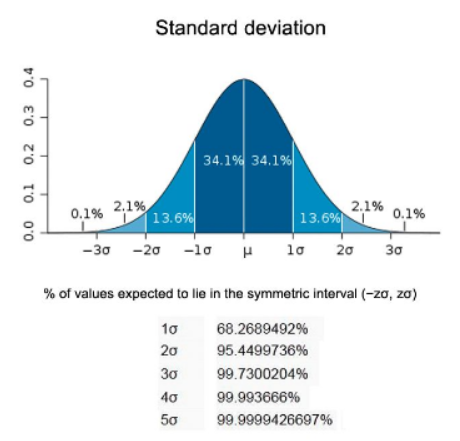

Jadi intinya semakin jauh dari nilai rata-rata (mean), semakin sedikit data yang ada. Dengan menggunakan konsep standar deviasi ini, kita dapat memiliki gagasan yang lebih baik tentang sebaran data dan seberapa jauh data kita dari nilai rata-rata.

#### Konsep viz dengan qq-plot
QQ Plot adalah alat visual yang digunakan untuk memeriksa apakah suatu variabel terdistribusi secara normal atau tidak. Jika variabel terdistribusi secara normal, kita akan melihat garis lurus pada plot.

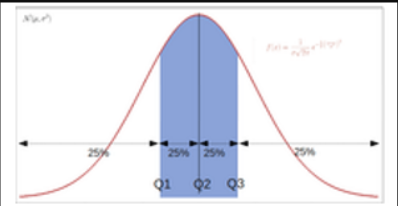

Jadi, dengan menggunakan QQ Plot, kita dapat melihat seberapa baik data kita cocok dengan distribusi normal. Jika titik-titik pada plot hampir berada di sepanjang garis 45 derajat, ini menunjukkan bahwa data kita terdistribusi secara normal. Namun, jika titik-titik tersebut tidak mengikuti garis lurus, ini menunjukkan bahwa distribusi data tidak normal. 

In [126]:
# kita bisa pakai fungsi stats untuk viz outlier dengan mudah
from scipy import stats

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

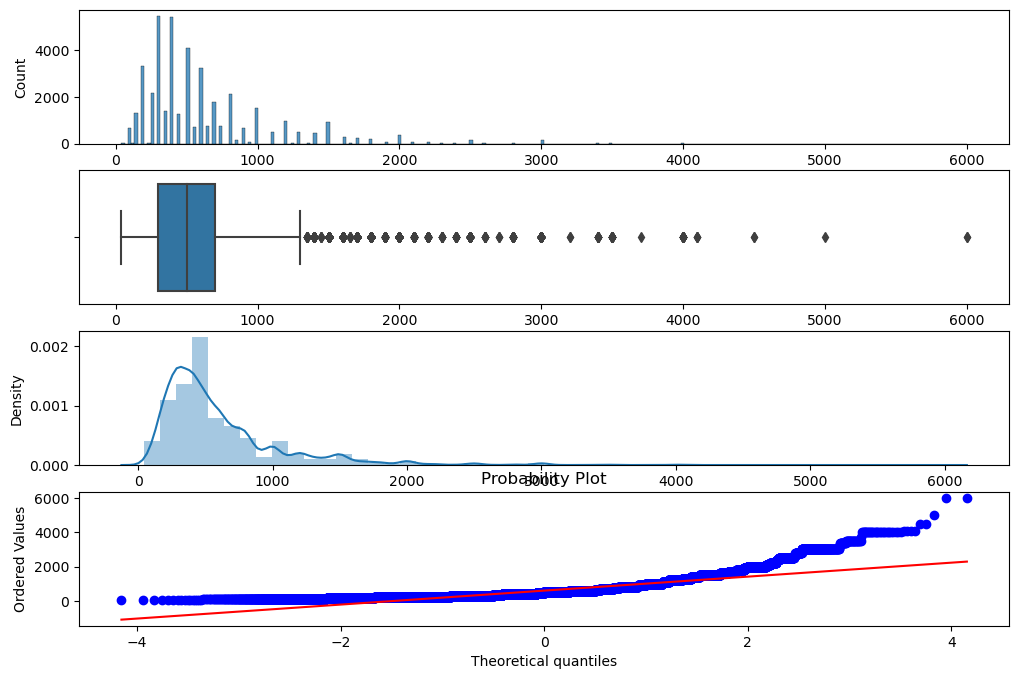

In [127]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data=data, x='approx_cost(for two people)', orient='v')

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])


plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'] , plot=plt)

plt.show()

berdasarkan viz tersebut kita memiliki banyak ssekali outlier dan perlu untuk dilakukan sesuatu. namun perlu observasi lebih lanjut

<IPython.core.display.Javascript object>

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

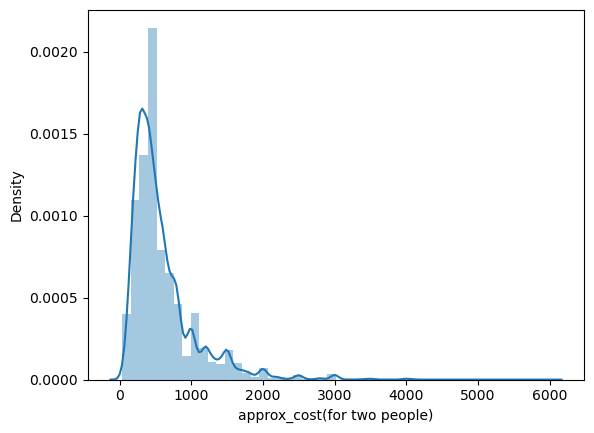

In [128]:
sns.distplot(data['approx_cost(for two people)'])

Seperti biasa, jika data tersebut ternyata mengalami skew kearah kanan. Maka perlu dilakukan transformassi

#### transformasi atau scaling data dengan logaritma karena datanya skew ke arah kanan
Kita bisa pakai beberapa fungsi logaritma:
- log10(): menghitung eksponen untuk mendapatkan nilai yang diperlukan dari 10 untuk setiap elemen dalam array
- log2(): menghitung logaritma basis 2 dari setiap elemen dalam array input.
- log1p(): Tujuan penggunaan fungsi ini adalah untuk menghindari masalah ketika nilai dalam array adalah 0, yang akan membuat logaritma menjadi tidak terdefinisi (undefined). Dengan menambahkan 1 ke nilai sebelum menghitung logaritma, kita dapat menghindari masalah tersebut.
- log(): menghitung logaritma natural dari setiap elemen dalam array input, dengan basis e.


Sepertinya data kita memiliki cukup banyakk yang bernilai 0. Data kita bisa saja bernilai 0 karena kesalahan ketik, jadi mari kita gunakan log1p, 

yaitu log1p = log(x+1), karna si log(0) tidak terdefinisi


In [129]:
np.log1p(data['approx_cost(for two people)'])

<IPython.core.display.Javascript object>

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51709    6.685861
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 42144, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

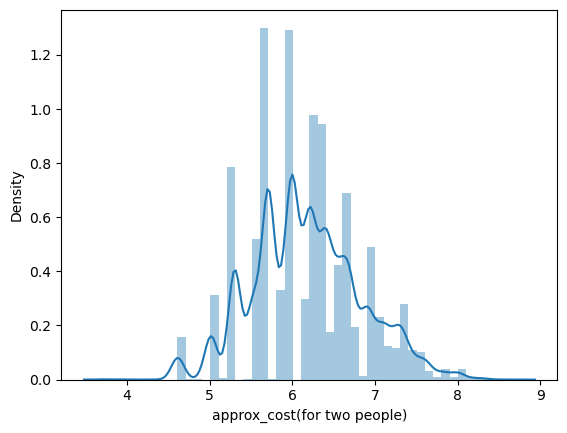

In [130]:
sns.distplot(np.log1p(data['approx_cost(for two people)']))

In [131]:
# Sepertinya sudah cukup baik hasill transformasinya dan tidak terlalu outlier
data['approx_cost(for two people)'] = np.log1p(data['approx_cost(for two people)'])

<IPython.core.display.Javascript object>

In [132]:
data['approx_cost(for two people)']

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51709    6.685861
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 42144, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

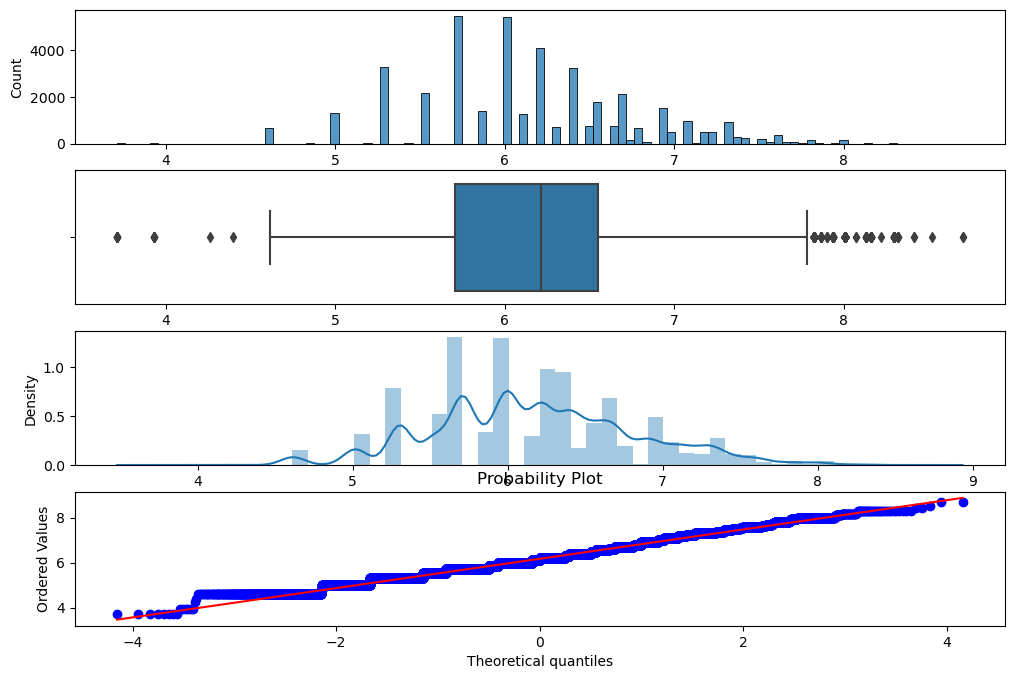

In [133]:
# Kita pastiin lagi apkaah sudah berpengaruh terhadp outlier

plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data=data, x='approx_cost(for two people)', orient='v')

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])


plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'] , plot=plt)

plt.show()

In [134]:
num_features

['votes', 'approx_cost(for two people)', 'target']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

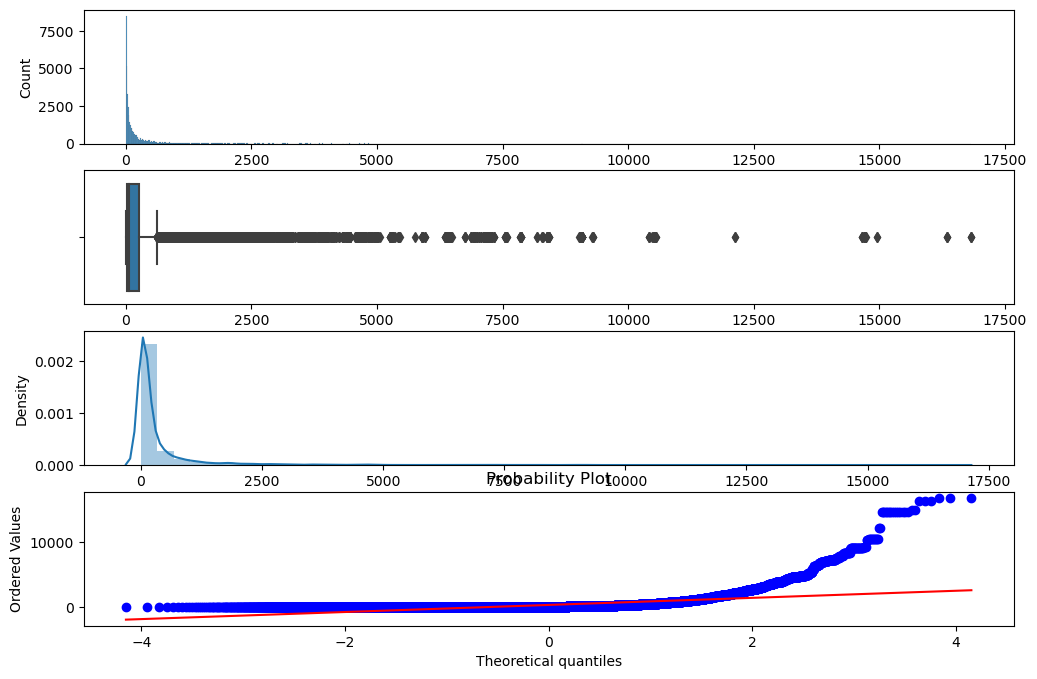

In [135]:
# Kita lanjut viz numerikal datanya

plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data=data, x='votes', orient='v')

plt.subplot(413)
sns.distplot(data['votes'])


plt.subplot(414)
stats.probplot(data['votes'] , plot=plt)

plt.show()

kolom 'votes' bahkan lebih parah outliernya

In [136]:
data['votes'] = np.log1p(data['votes'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

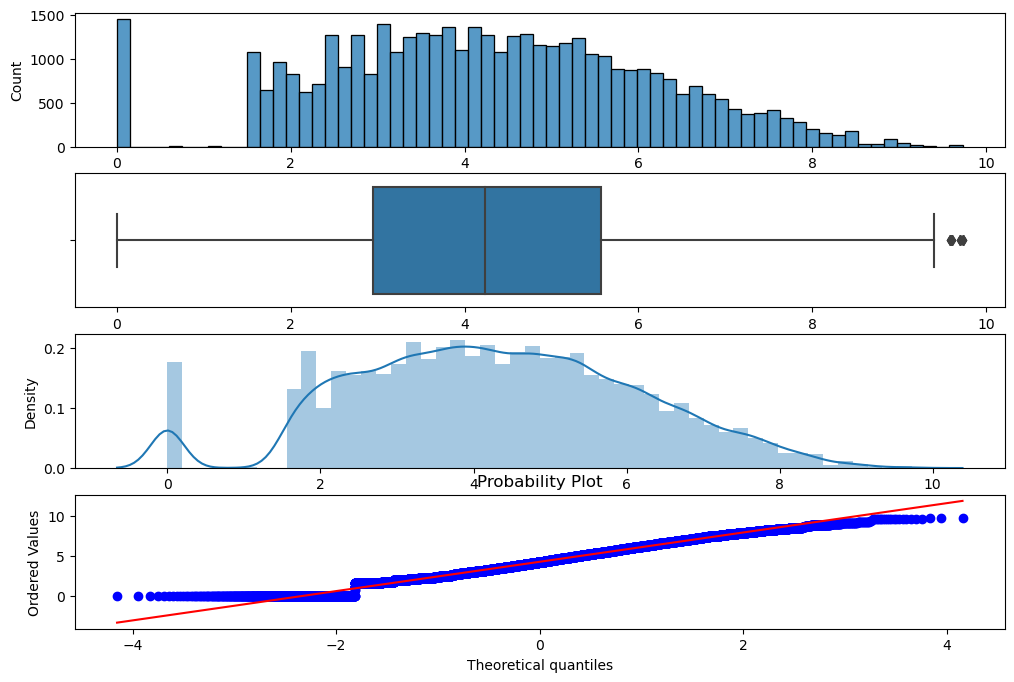

In [137]:
# kita cek

plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data=data, x='votes', orient='v')

plt.subplot(413)
sns.distplot(data['votes'])


plt.subplot(414)
stats.probplot(data['votes'] , plot=plt)

plt.show()

udah okelahh 😅 😅

Trus data kategorikal seperti target, dll itu tidak perlu cek outlier

### Model Building

In [138]:
# sebelum itu. INGATT selalu cek tipe data sebelum modeling
data.dtypes

votes                                 float64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
target                                  int64
online_order_Yes                        int32
book_table_Yes                          int32
rest_type_Casual Dining                 int32
rest_type_Delivery                      int32
rest_type_Dessert Parlor                int32
rest_type_Quick Bites                   int32
rest_type_other                         int32
listed_in(type)_Cafes                   int32
listed_in(type)_Delivery                int32
listed_in(type)_Desserts                int32
listed_in(type)_Dine-out                int32
listed_in(type)_Drinks & nightlife      int32
listed_in(type)_Pubs and bars           int32
dtype: object

In [139]:
X = data.drop('target', axis=1)
X.head(5)

,votes,location,approx_cost(for two people),listed_in(city),online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,6.654153,0.477124,6.685861,0.482993,1,1,1,0,0,0,0,0,0,0,0,0,0
1,6.669498,0.477124,6.685861,0.482993,1,0,1,0,0,0,0,0,0,0,0,0,0
2,6.823286,0.477124,6.685861,0.482993,1,0,0,0,0,0,1,0,0,0,0,0,0
3,4.488636,0.477124,5.707110,0.482993,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5.117994,0.523333,6.398595,0.482993,0,0,1,0,0,0,0,0,0,0,0,0,0


In [140]:
X.columns

Index(['votes', 'location', 'approx_cost(for two people)', 'listed_in(city)',
       'online_order_Yes', 'book_table_Yes', 'rest_type_Casual Dining',
       'rest_type_Delivery', 'rest_type_Dessert Parlor',
       'rest_type_Quick Bites', 'rest_type_other', 'listed_in(type)_Cafes',
       'listed_in(type)_Delivery', 'listed_in(type)_Desserts',
       'listed_in(type)_Dine-out', 'listed_in(type)_Drinks & nightlife',
       'listed_in(type)_Pubs and bars'],
      dtype='object')

In [141]:
y = data['target']

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [143]:
X_train.shape

(31608, 17)

In [144]:
X.shape

(42144, 17)

### Random Forest Classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf_model = RandomForestClassifier()

In [147]:
# latih
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
y_rf_tt_pred = rf_model.predict(X_test)

In [149]:
y_rf_tt_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_rf_tt_pred, y_test)

0.9177107061503417

In [151]:
confusion_matrix(y_rf_tt_pred, y_test)

array([[4987,  447],
       [ 420, 4682]], dtype=int64)

In [205]:
print(classification_report(y_test, y_rf_tt_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5407
           1       0.92      0.91      0.92      5129

    accuracy                           0.92     10536
   macro avg       0.92      0.92      0.92     10536
weighted avg       0.92      0.92      0.92     10536



#### Hypertuning dengan RandomizedSearchCV

In [152]:
# jumlah tree yang diinginkan
n_estimators = [int(x) for x in np.linspace(100, 200, num=3)]

# jumlah fitur yang dipertimbangkan setiap split
max_features = ["auto", "sqrt"]

# jumlah kedalaman pohon maksimal
max_depth = [int(x) for x in np.linspace(5, 30, num=3)]

# jumlah minimal sampel untuk setiap split
min_samples_split = [5, 10, 100]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
# tampung parameternya
random_grid = {
    'n_estimators':n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [154]:
random_grid

{'n_estimators': [100, 150, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 17, 30],
 'min_samples_split': [5, 10, 100]}

maka nantinya akan ada 3x2x3x3 = 108 iterasi

In [155]:
from sklearn.model_selection import RandomizedSearchCV

estimator_rf = RandomForestClassifier()

In [156]:
rf_random = RandomizedSearchCV(estimator=estimator_rf, param_distributions=random_grid, cv=2, verbose=2, n_jobs=-1)

In [157]:
# latih
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 17, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 100],
                                        'n_estimators': [100, 150, 200]},
                   verbose=2)

In [158]:
# parameter terbaik hasil CV
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 17}

In [159]:
# masukin best param ke estimator model
rf_random.best_estimator_

RandomForestClassifier(max_depth=17, min_samples_split=5, n_estimators=150)

In [160]:
# kita ulang modelinngnya
rf_best = RandomForestClassifier(max_depth=17, min_samples_split=100, n_estimators=150, max_features='sqrt')

In [161]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, min_samples_split=100, n_estimators=150)

In [162]:
y_rf_cv_tt_pred = rf_best.predict(X_test)

In [163]:
y_rf_cv_tt_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [164]:
accuracy_score(y_rf_cv_tt_pred, y_test)

0.835041761579347

In [165]:
confusion_matrix(y_rf_cv_tt_pred, y_test)

array([[4540,  871],
       [ 867, 4258]], dtype=int64)

#### Decision Tree Classifier

In [170]:
dtr = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
dtr

DecisionTreeClassifier(random_state=42)

In [171]:
y_tt_dtr_pred = dtr.predict(X_test)

In [172]:
y_tt_dtr_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [173]:
accuracy_dtr = accuracy_score(y_test, y_tt_dtr_pred)
accuracy_dtr

0.9323272589217919

In [174]:
confusion_matrix(y_tt_dtr_pred, y_test)

array([[5019,  325],
       [ 388, 4804]], dtype=int64)

In [204]:
print(classification_report(y_test, y_tt_dtr_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5407
           1       0.93      0.94      0.93      5129

    accuracy                           0.93     10536
   macro avg       0.93      0.93      0.93     10536
weighted avg       0.93      0.93      0.93     10536



#### mencoba hypertuning dtr

In [179]:
dtr_cv2 = DecisionTreeClassifier()

In [180]:
param_grid_dtr = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [182]:
grid_search_dtr_2 = GridSearchCV(estimator=dtr_cv2, param_grid=param_grid_dtr, cv=5)

In [183]:
grid_search_dtr_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [184]:
print("Best Parameters:", grid_search_dtr_2.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [185]:
best_dtr_model = grid_search_dtr_2.best_estimator_
best_dtr_model

DecisionTreeClassifier(max_depth=20, max_features='sqrt')

In [186]:
dtr_best = DecisionTreeClassifier(criterion='gini', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)

In [187]:
dtr_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features='sqrt')

In [188]:
y_tt_dtr_cv_pred = dtr_best.predict(X_test)
y_tt_dtr_cv_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [189]:
accuracy_score(y_tt_dtr_cv_pred, y_test)

0.8508921791951405

In [190]:
confusion_matrix(y_tt_dtr_cv_pred, y_test)

array([[4599,  763],
       [ 808, 4366]], dtype=int64)

In [203]:
print(classification_report(y_test, y_tt_dtr_cv_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      5407
           1       0.84      0.85      0.85      5129

    accuracy                           0.85     10536
   macro avg       0.85      0.85      0.85     10536
weighted avg       0.85      0.85      0.85     10536



### Logistic Regression

In [191]:
lgr = LogisticRegression()

In [192]:
lgr.fit(X_train, y_train)

LogisticRegression()

In [193]:
y_tt_lgr_pred = lgr.predict(X_test)

In [194]:
accuracy_lgr = accuracy_score(y_test, y_tt_lgr_pred)
accuracy_lgr

0.7911921032649962

#### K-nearest Neighbor

In [195]:
knn = KNeighborsClassifier(n_neighbors=5)

In [196]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [197]:
y_tt_knn_pred = knn.predict(X_test)
y_tt_knn_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [198]:
accuracy_knn = accuracy_score(y_test, y_tt_knn_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.8495634016704632


In [200]:
confusion_matrix(y_test, y_tt_knn_pred)

array([[4610,  797],
       [ 788, 4341]], dtype=int64)

In [202]:
print(classification_report(y_test, y_tt_knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5407
           1       0.84      0.85      0.85      5129

    accuracy                           0.85     10536
   macro avg       0.85      0.85      0.85     10536
weighted avg       0.85      0.85      0.85     10536



#### Gradient Boosting Classifier: ensemble

In [206]:
gbc = GradientBoostingClassifier()

In [207]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [208]:
y_tt_gbc_pred = gbc.predict(X_test)

In [209]:
y_tt_gbc_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [210]:
accuracy_gbc = accuracy_score(y_test, y_tt_gbc_pred)
print("Accuracy:", accuracy_gbc)

Accuracy: 0.8132118451025057


In [211]:
confusion_matrix(y_test, y_tt_gbc_pred)

array([[4327, 1080],
       [ 888, 4241]], dtype=int64)

In [212]:
print(classification_report(y_test, y_tt_gbc_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      5407
           1       0.80      0.83      0.81      5129

    accuracy                           0.81     10536
   macro avg       0.81      0.81      0.81     10536
weighted avg       0.81      0.81      0.81     10536



In [213]:
feature_importances = dtr.feature_importances_
feature_importances

array([5.92318404e-01, 1.29143326e-01, 1.17524663e-01, 5.67167086e-02,
       2.17704724e-02, 9.08874882e-03, 1.08531019e-02, 7.14307073e-03,
       1.06687275e-02, 1.44368366e-02, 1.52867467e-02, 8.68088779e-04,
       4.50093304e-03, 4.97012811e-03, 3.99839244e-03, 1.59326622e-04,
       5.52326060e-04])

## Conclusion

After training several models using various algorithms, I managed to achieve the best model for Zomato restaurant success prediction. Using the Decision Tree Classifier, I got an accuracy of 93.3% 😮😮, which shows the model's ability to correctly predict whether a restaurant will be successful or not in the 'target' variable. The model is able to handle what is arguably quite complex data well and provide valuable insights to restaurant owners and users of the Zomato platform. As such, we believe that this model can add significant value in optimizing restaurant success on Zomato 😇😇.

In [215]:
import pickle

model_path = 'C:/Users/ASUS/kode/projek/Prediksi_Kesuksesan Perusahaan Zomato/resto_success.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(dtr, file)

print("Model berhasil disimpan di", model_path)

Model berhasil disimpan di C:/Users/ASUS/kode/projek/Prediksi_Kesuksesan Perusahaan Zomato/resto_success.pkl


In [214]:
data.head(5)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,6.654153,0.477124,6.685861,0.482993,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,6.669498,0.477124,6.685861,0.482993,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,6.823286,0.477124,6.685861,0.482993,1,1,0,0,0,0,0,1,0,0,0,0,0,0
3,4.488636,0.477124,5.707110,0.482993,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5.117994,0.523333,6.398595,0.482993,1,0,0,1,0,0,0,0,0,0,0,0,0,0
